In [1]:
from diffusers.utils import load_image

image = load_image(
  "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

(512, 512)


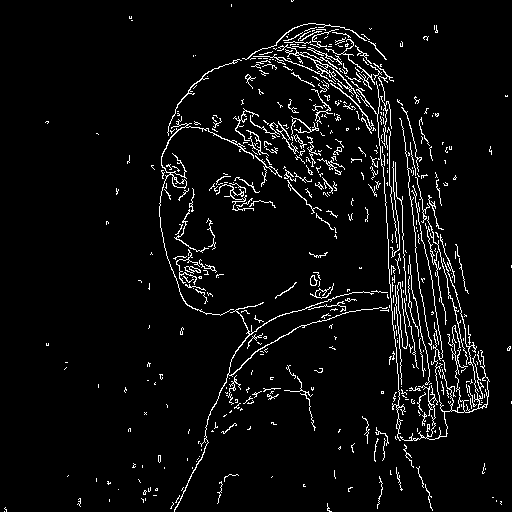

In [2]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

def to_canny(image, low_threshold=100, high_threshold=200):
  image = cv2.Canny(image, low_threshold, high_threshold)
  image = image[:, :, None]
  image = np.concatenate([image, image, image], axis=2)
  canny_image = Image.fromarray(image)
  return canny_image


canny_image = to_canny(image)
print(canny_image.size)
canny_image

In [3]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet_id = 'lllyasviel/control_v11p_sd15_canny'
controlnet = ControlNetModel.from_pretrained(
  controlnet_id,
  torch_dtype=torch.float16,
)

model_id = 'runwayml/stable-diffusion-v1-5'
pipe = StableDiffusionControlNetPipeline.from_pretrained(
  model_id,
  controlnet=controlnet,
  torch_dtype=torch.float16,
  requires_safety_checker=False,
)

pipe.unet = torch.compile(pipe.unet, mode='reduce-overhead', fullgraph=True)

pipe.to('cuda')
pipe.enable_xformers_memory_efficient_attention()
pipe.safety_checker = None

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:
generator = torch.manual_seed(666)

state = generator.get_state()
print(state.shape)
print(state)

print(generator)

torch.Size([5056])
tensor([154,   2,   0,  ...,   0,   0,   0], dtype=torch.uint8)


  0%|          | 0/60 [00:00<?, ?it/s]

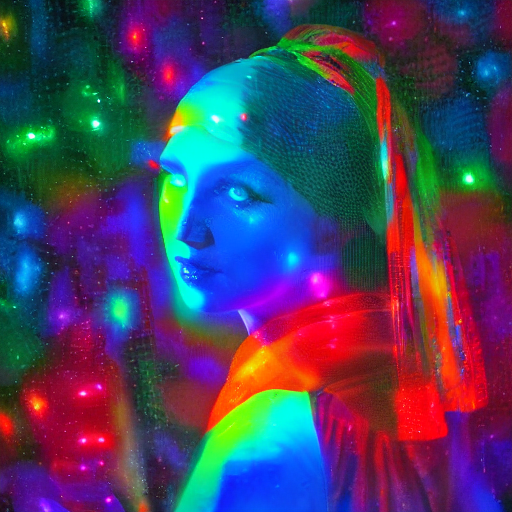

In [5]:
prompt = 'disco dancer with colorful lights'

out_image = pipe(
  prompt,
  num_inference_steps=60,
  generator=generator,
  image=canny_image
).images[0]

out_image

  0%|          | 0/60 [00:00<?, ?it/s]

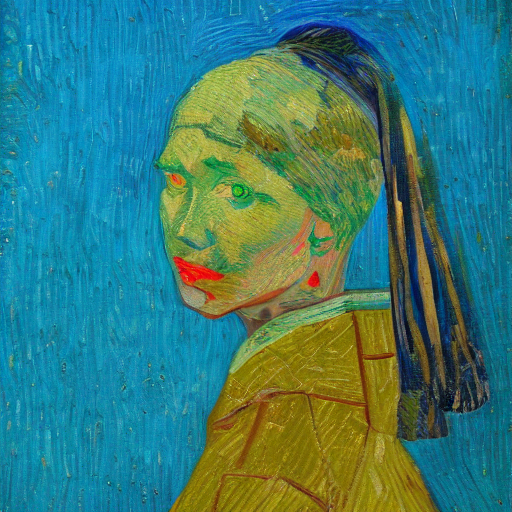

In [6]:
prompt = 'van gogh style with beautiful background'

out_image = pipe(
  prompt,
  num_inference_steps=60,
  generator=generator,
  image=canny_image
).images[0]

out_image